In [1]:
import keras
from keras.applications import mobilenet
from keras.models import model_from_json
from keras.preprocessing.image import load_img

from load_hand_data import parse_label, preprocess_feature
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


## Loading model

In [2]:
model_name = 'cv2_batch_16_epoch_20_data_30_adam_random'
checkpoint = 'weights.20-0.01-0.24'

In [3]:
# load json and create model
json_file = open(model_name + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json, custom_objects={
    'relu6': mobilenet.relu6,
    'DepthwiseConv2D': mobilenet.DepthwiseConv2D})
# load weights into new model
loaded_model.load_weights(
    "/media/dawars/hdd/dawars/Hand/temalab_ckpt/"+model_name +"/" + checkpoint + ".hdf5")

loaded_model.compile(loss='mean_squared_error',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['acc'])

## Inference function

In [4]:
def show_img(url, joints):
    image = cv2.imread(url, )
    for i in range(0, len(joints), 2):
        v = int(float(joints[i]))
        u = int(float(joints[i+1]))
        image[u-2:u+2, v-2:v+2, 0]=255
    imgplot = plt.imshow(image)

In [5]:
def inference(model, url):
    X = preprocess_feature([url])

    preds = model.predict(X, batch_size=1)
    joints = parse_label(preds[0])
    # print(joints)
    show_img(url, joints)

## Visualizing predictions

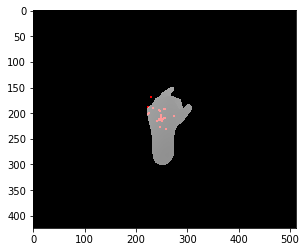

In [6]:
inference(loaded_model, "/home/dawars/datasets/Hand/SyntheticHand/Test/male/1/Depth/0000663.png")

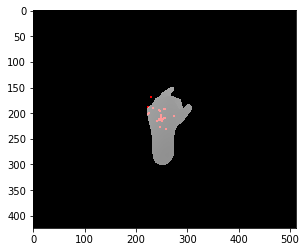

In [7]:
inference(loaded_model, "/home/dawars/datasets/Hand/SyntheticHand/Test/male/1/Depth/0000663.png")

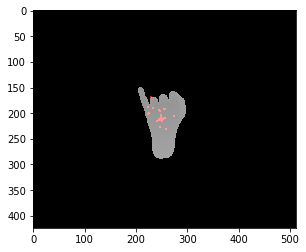

In [8]:
inference(loaded_model, "/home/dawars/datasets/Hand/SyntheticHand/Test/male/2/Depth/0000900.png")

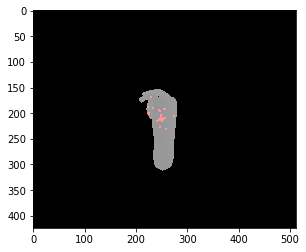

In [9]:
inference(loaded_model, "/home/dawars/datasets/Hand/SyntheticHand/Test/male/10/Depth/0000370.png")

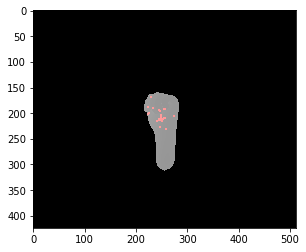

In [10]:
inference(loaded_model, "/home/dawars/datasets/Hand/SyntheticHand/Test/male/5/Depth/0000782.png")